0706022210014 - Belinda Putri Adi Permana

Breast Cancer Wincosin

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

In [2]:
url_bc = r'https://raw.githubusercontent.com/belinda2201/Data-Mining/refs/heads/main/adult.csv'
df_bc = pd.read_csv(url_bc)

In [3]:
df_bc.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_bc.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df_bc.dropna(inplace=True)
df_bc.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
for column in ['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']:
    print(df_bc[column].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-

In [8]:
print(df_bc.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


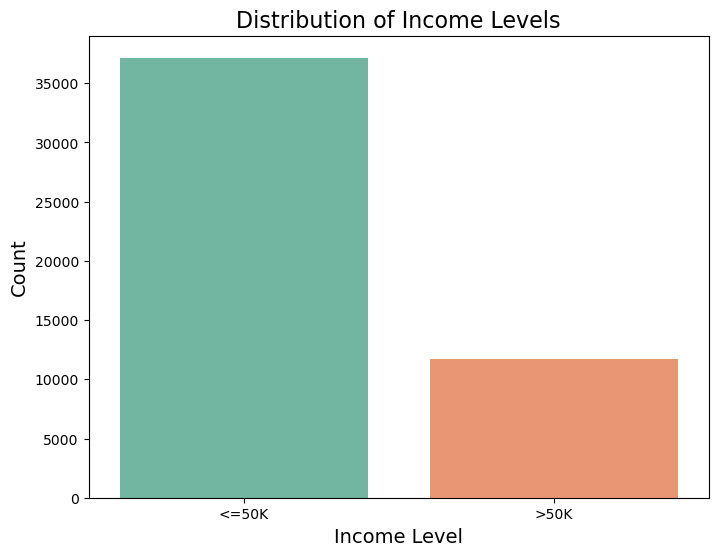

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_bc, x='income', palette='Set2')

plt.title('Distribution of Income Levels', fontsize=16)
plt.xlabel('Income Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [10]:
label_encoders = {}
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']  # Columns you want to encode
for col in categorical_cols:
    le = LabelEncoder()
    df_bc[col] = le.fit_transform(df_bc[col])
    label_encoders[col] = le

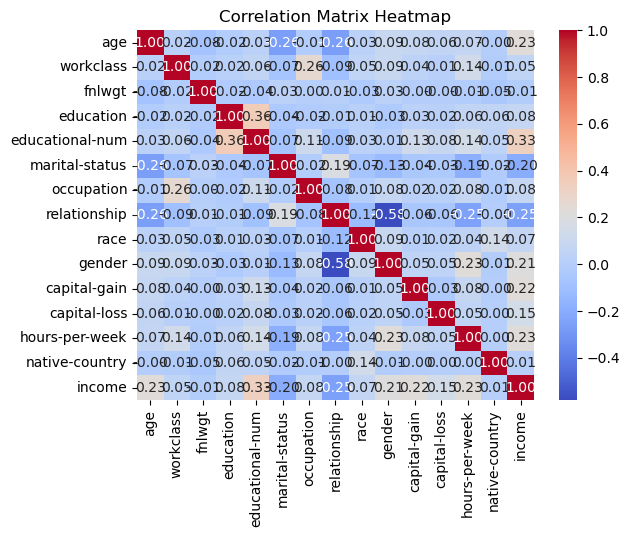

In [11]:
sns.heatmap(df_bc.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
X = df_bc.drop('income', axis=1)
y = df_bc['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((39073, 14), (9769, 14))

Decision Tree - Entropy

In [14]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [15]:
y_pred_en = clf_en.predict(X_test)

In [16]:
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8449


In [17]:
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_en.score(X_test, y_test)))

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, 'entropy = 0.987\nsamples = 

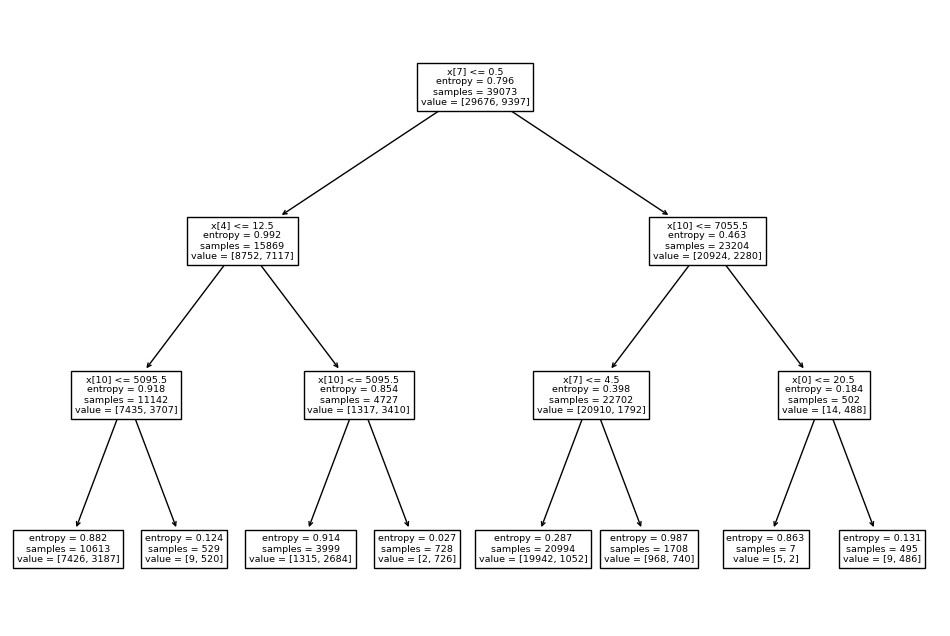

In [18]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [19]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



Decision Tree - Gini

In [20]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_gini = clf_gini.predict(X_test)

In [22]:
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.8449


In [23]:
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_gini.score(X_test, y_test)))

Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, 'gini = 0.491\nsamples = 1708\nvalue = [968, 740]'),
 Text(0.8

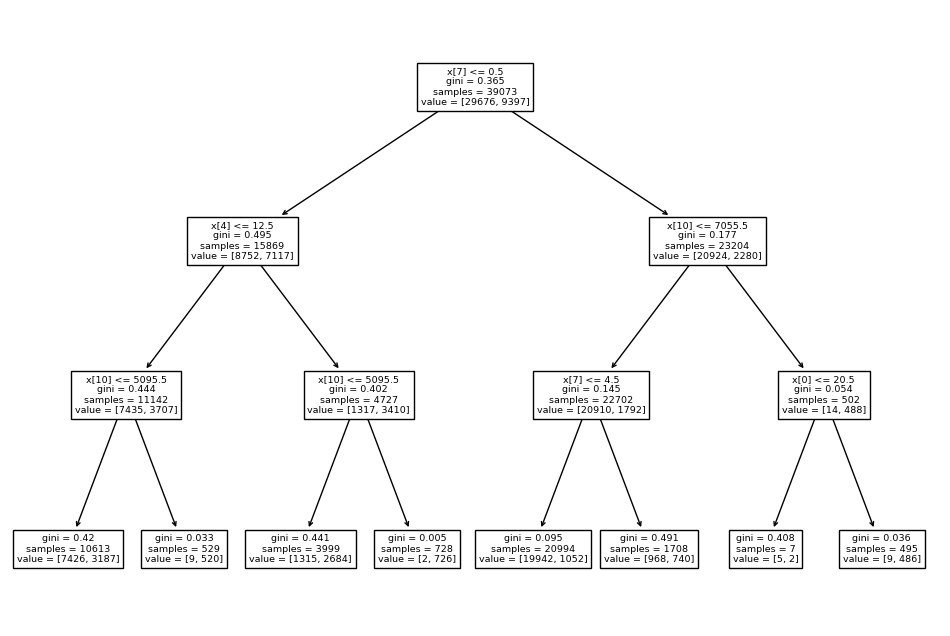

In [24]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [25]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



Confusion Matrix

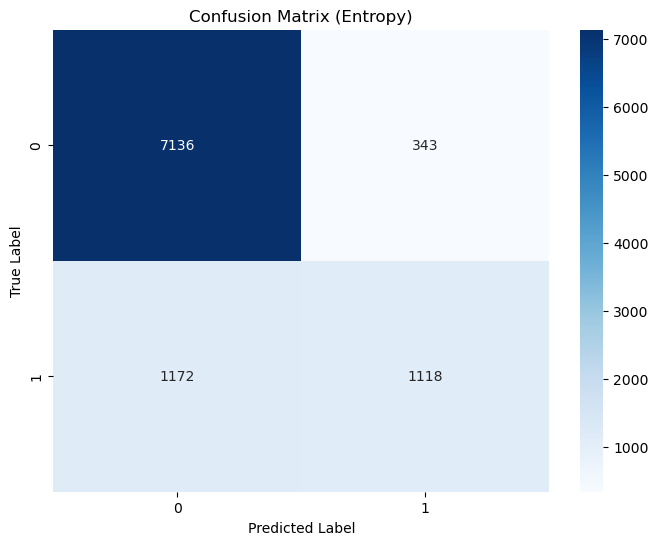

In [26]:
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Entropy)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

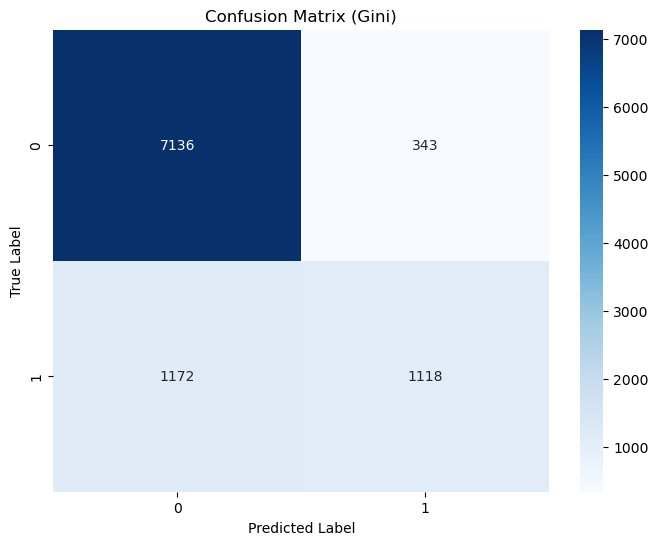

In [27]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Gini)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Naive Bayes

In [28]:
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [29]:
nb_y_pred = nb_classifer.predict(X_test)

In [30]:
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.7994


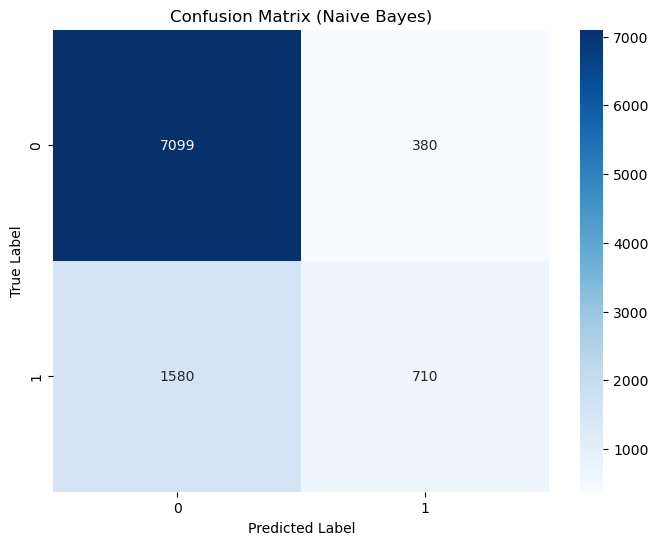

In [31]:
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [32]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [33]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7479
           1       0.62      0.30      0.41      2290

    accuracy                           0.79      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769

Accuracy: 0.7925069096120381


Logistic Regression

In [34]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred_log = log_reg_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_log))

Accuracy: 0.7925069096120381
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7479
           1       0.62      0.30      0.41      2290

    accuracy                           0.79      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769



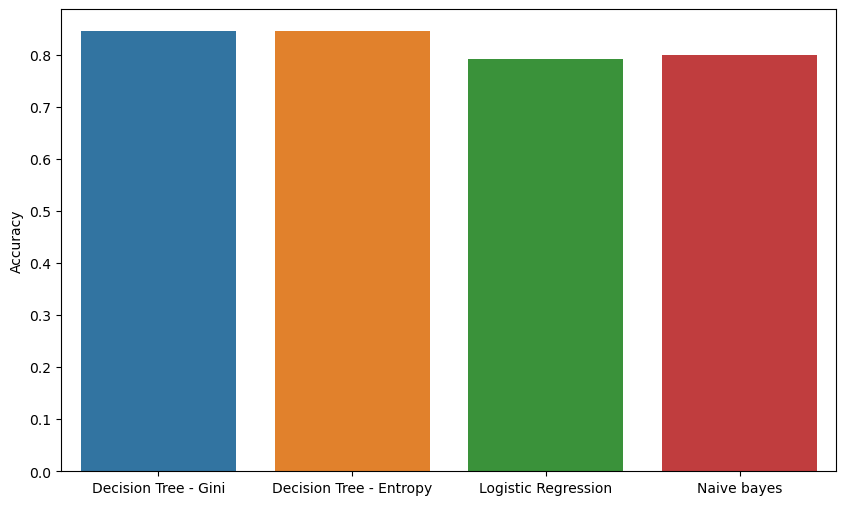

Decision Tree - Gini: 0.84
Decision Tree - Entropy: 0.84
Logistic Regression: 0.79
Naive bayes: 0.80


In [37]:
accuracy_scores = {
    "Decision Tree - Gini": accuracy_score(y_test, y_pred_gini),
    "Decision Tree - Entropy": accuracy_score(y_test, y_pred_en),
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Naive bayes": accuracy_score(y_test, nb_y_pred)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.ylabel("Accuracy")
plt.show()

for model, score in accuracy_scores.items():
    print(f"{model}: {score:.2f}")

Here we can see the highest accuracy is Decision Tree - Gini and Entropy, so it's better to use Decision Tree.

Adult Income Dataset

In [38]:
url_ai = r'https://raw.githubusercontent.com/belinda2201/Data-Mining/refs/heads/main/UCI%20breast-cancer-wisconsin-data.csv'
df_ai = pd.read_csv(url_ai)
df_ai.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
df_ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
df_ai.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [41]:
df_ai.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [42]:
df_ai.dropna(inplace=True)
df_ai.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The code below is for checking the unique values from the data, but most of the unique values are from ID column, so it's better to drop them.

In [43]:
unique_values = {column: df_ai[column].unique() for column in df_ai.columns}

for column, values in unique_values.items():
    print(f"{column}: {values}")

id: [   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001    845636  84610002    846226    846381
  84667401  84799002    848406  84862001    849014   8510426   8510653
   8510824   8511133    851509    852552    852631    852763    852781
    852973    853201    853401    853612  85382601    854002    854039
    854253    854268    854941    855133    855138    855167    855563
    855625    856106  85638502    857010  85713702     85715    857155
    857156    857343    857373    857374    857392    857438  85759902
    857637    857793    857810    858477    858970    858981    858986
    859196  85922302    859283    859464    859465    859471    859487
    859575    859711    859717    859983   8610175   8610404   8610629
   8610637   8610862   8610908    861103   8611161   8611555   8611792
   8612080   8612399  86135501  86135502    861597    861598    861648
    861799    861853    862009    862028     86208     86211    862261
  

In [44]:
df_ai = df_ai.drop(columns=['id']) 

The codes below are for machine learning / classification purposes.

In [45]:
X = df_ai[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']].values
y = df_ai['diagnosis'].values

In [46]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

C:\Users\Belinda\AppData\Local\Temp\ipykernel_19728\692623639.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ai.corr(), annot=True, fmt='.2f', cmap='coolwarm')


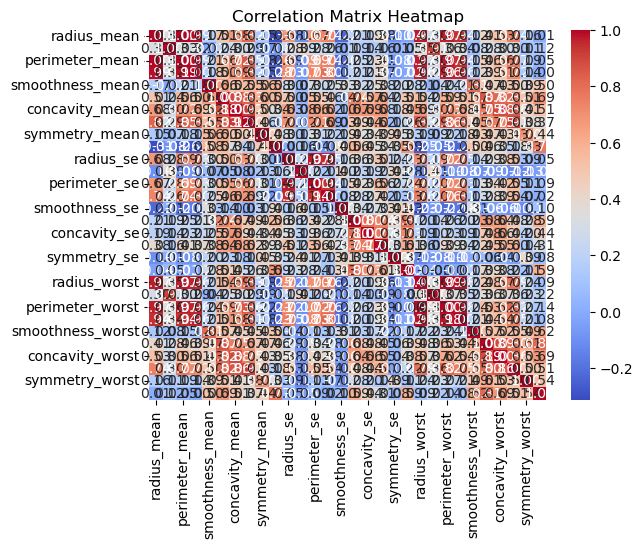

In [49]:
sns.heatmap(df_ai.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Decision Tree - Entropy

In [50]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [51]:
y_pred_en = clf_en.predict(X_test)

In [52]:
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9298


In [53]:
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_en.score(X_test, y_test)))

Training set score: 0.9516
Test set score: 0.9298


[Text(0.625, 0.875, 'x[22] <= 0.334\nentropy = 0.958\nsamples = 455\nvalue = [282, 173]'),
 Text(0.5, 0.625, 'x[27] <= 0.381\nentropy = 0.51\nsamples = 318\nvalue = [282, 36]'),
 Text(0.25, 0.375, 'x[3] <= 0.234\nentropy = 0.143\nsamples = 246\nvalue = [241, 5]'),
 Text(0.125, 0.125, 'entropy = 0.07\nsamples = 240\nvalue = [238, 2]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.75, 0.375, 'x[27] <= 0.551\nentropy = 0.986\nsamples = 72\nvalue = [41, 31]'),
 Text(0.625, 0.125, 'entropy = 0.863\nsamples = 56\nvalue = [40, 16]'),
 Text(0.875, 0.125, 'entropy = 0.337\nsamples = 16\nvalue = [1, 15]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 137\nvalue = [0, 137]')]

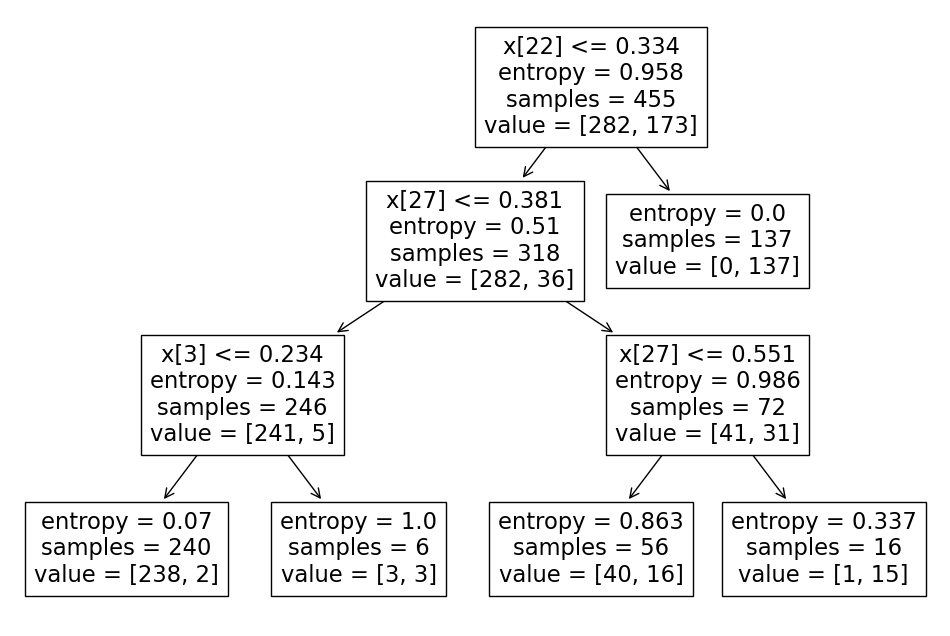

In [54]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [55]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        75
           1       0.92      0.87      0.89        39

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Decision Tree - Gini

In [56]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
y_pred_gini = clf_gini.predict(X_test)

In [58]:
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.9386


In [59]:
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_gini.score(X_test, y_test)))

Training set score: 0.9626
Test set score: 0.9386


[Text(0.5769230769230769, 0.875, 'x[22] <= 0.323\ngini = 0.471\nsamples = 455\nvalue = [282, 173]'),
 Text(0.3076923076923077, 0.625, 'x[27] <= 0.537\ngini = 0.184\nsamples = 312\nvalue = [280, 32]'),
 Text(0.15384615384615385, 0.375, 'x[3] <= 0.234\ngini = 0.109\nsamples = 295\nvalue = [278, 17]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.074\nsamples = 284\nvalue = [273, 11]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.46153846153846156, 0.375, 'x[21] <= 0.305\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.8461538461538461, 0.625, 'x[22] <= 0.334\ngini = 0.028\nsamples = 143\nvalue = [2, 141]'),
 Text(0.7692307692307693, 0.375, 'x[0] <= 0.421\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(

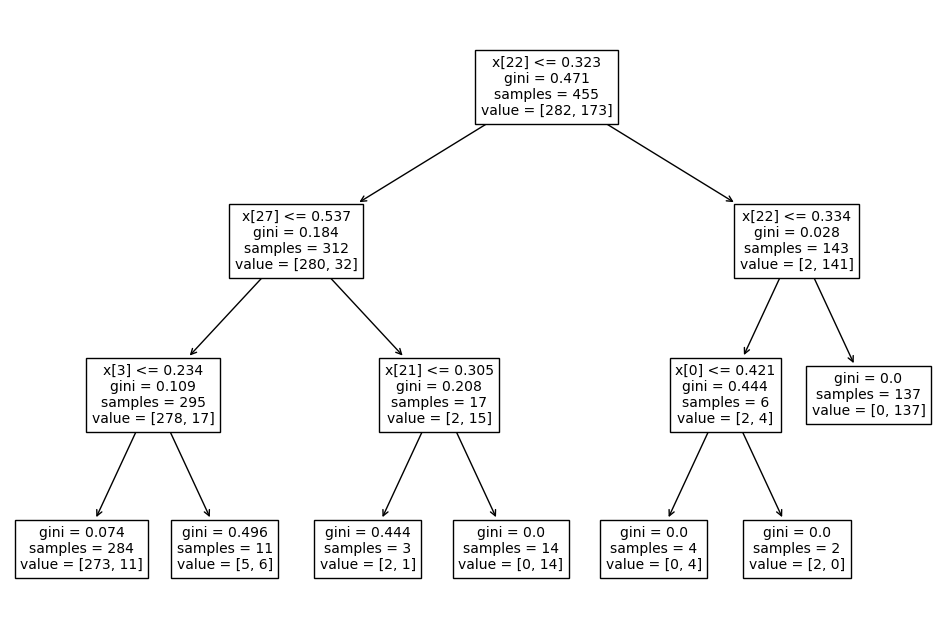

In [60]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [61]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.92      0.90      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Confusion Matrix

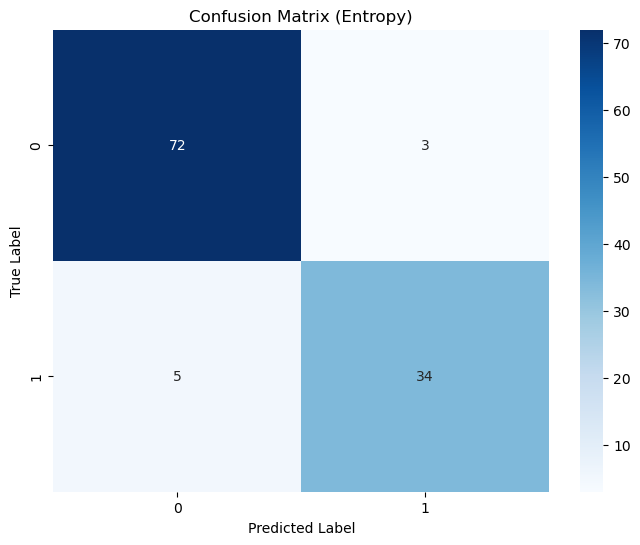

In [62]:
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Entropy)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

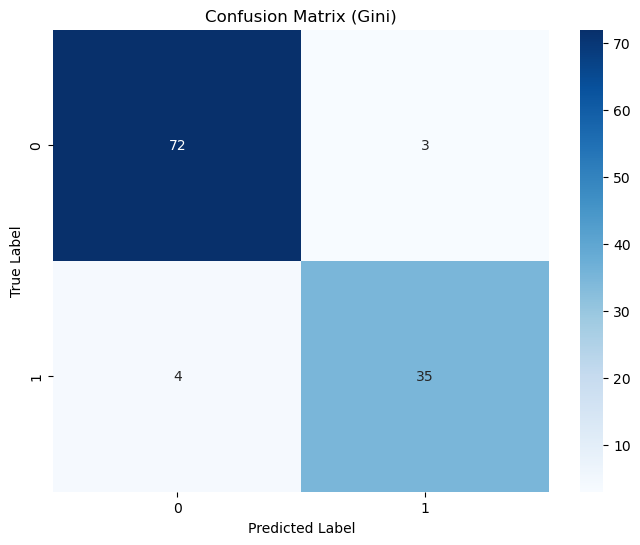

In [63]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Gini)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Naive Bayes

In [64]:
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [65]:
nb_y_pred = nb_classifer.predict(X_test)

In [66]:
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.9561


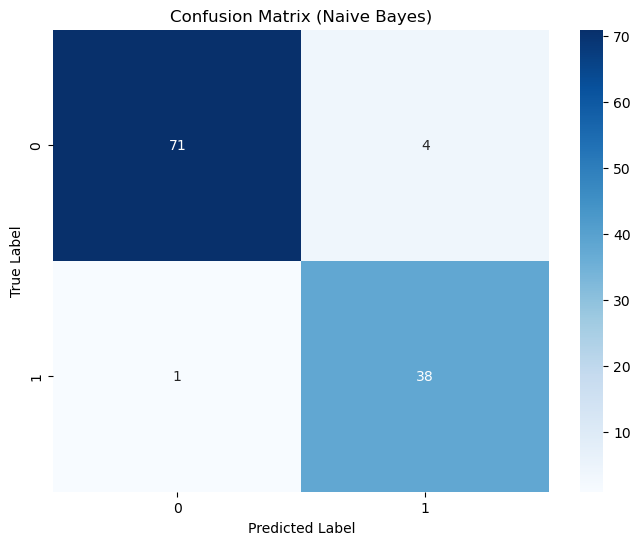

In [67]:
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [69]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Accuracy: 1.0


K-NN

In [70]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.97      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy: 0.9912280701754386


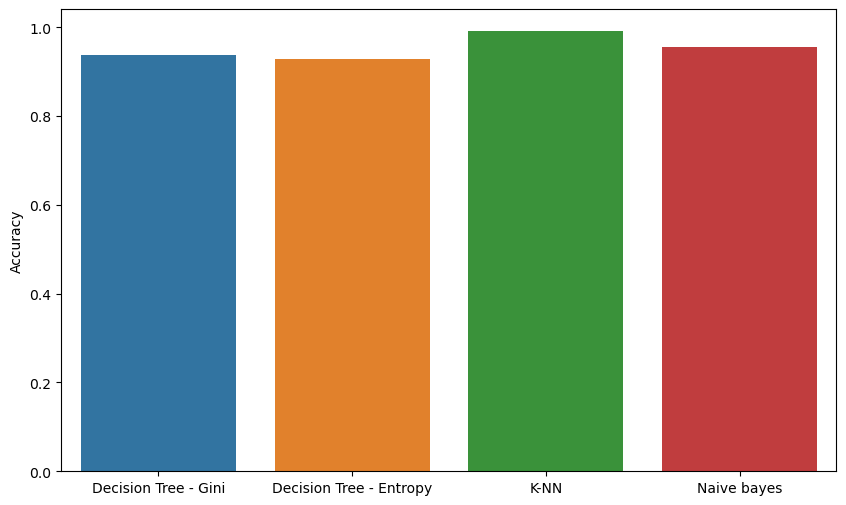

Decision Tree - Gini: 0.94
Decision Tree - Entropy: 0.93
K-NN: 0.99
Naive bayes: 0.96


In [71]:
accuracy_scores = {
    "Decision Tree - Gini": accuracy_score(y_test, y_pred_gini),
    "Decision Tree - Entropy": accuracy_score(y_test, y_pred_en),
    "K-NN": accuracy_score(y_test, y_pred_knn),
    "Naive bayes": accuracy_score(y_test, nb_y_pred)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.ylabel("Accuracy")
plt.show()

for model, score in accuracy_scores.items():
    print(f"{model}: {score:.2f}")

From this, we can conclude that using K-NN will give us the most accurate result with 0.99 accuracy, followed by Naive bayes, Decision Tree - Gini and Decision Tree - Entropy.